#Librerias

In [14]:
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
import pandas as pd

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [15]:
#Cargar desde computadora
data = np.genfromtxt('dataset_sintetico_ampliado.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)

# Mostrar los primeros 5 elementos para revisar cómo está cargado
print("Forma del array:", data.shape)


Forma del array: (50976, 28)


In [16]:
# Eliminar la primera columna (índice 0)
data = np.delete(data, 0, axis=1)
# Mostrar los datos y su forma después de eliminar la columna 0
print("\nDatos después de eliminar la primera columna:")
print(data)
print("Forma después:", data.shape)


Datos después de eliminar la primera columna:
[['19556' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Short Distance']
 ['90035' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Long Distance']
 ['12360' 'Male' 'disloyal Customer' ... 'Neutral or Negative experience'
  'False' 'Short Distance']
 ...
 ['50974' 'Female' 'Loyal Customer' ... 'Neutral or Negative experience'
  'False' 'Long Distance']
 ['50975' 'Female' 'Loyal Customer' ... 'Neutral or Negative experience'
  'True' 'Long Distance']
 ['50976' 'Female' 'Loyal Customer' ... 'Positive experience' 'False'
  'Long Distance']]
Forma después: (50976, 27)


Limpiar Codigo

In [17]:
# Transformar 'Gender': 'Male' -> 0, 'Female' -> 1
data[:, 1] = np.where(data[:, 1] == 'Male', 0, 1)

# Transformar 'Customer Type': 'Loyal Customer' -> 1, 'Disloyal Customer' -> 0
data[:, 2] = np.where(data[:, 2] == 'Loyal Customer', 1, 0)

# Transformar 'Type of Travel': 'Business travel' -> 1, 'Personal Travel' -> 0
data[:, 4] = np.where(data[:, 4] == 'Business travel', 1, 0)

# Transformar 'satisfaction': 'satisfied' -> 1, 'neutral or dissatisfied' -> 0
data[:, -4] = np.where(data[:, -4] == 'satisfied', 1, 0)

# Transformar 'Customer Feedback': 'Positive experience' -> 1, 'Neutral or Negative experience' -> 0
data[:, -3] = np.where(data[:, -3] == 'Positive experience', 1, 0)

# Transformar 'Requested Special Assistance': 'True' -> 1, 'False' -> 0
data[:, -2] = np.where(data[:, -2] == 'True', 1, 0)

# Transformar 'Passenger Group': 'Short Distance' -> 0, 'Medium Distance' -> 1, 'Long Distance' -> 2
data[:, -1] = np.where(data[:, -1] == 'Short Distance', 0,
                       np.where(data[:, -1] == 'Medium Distance', 1, 2))

# Mostrar los primeros 5 registros para verificar
print(data[:5])
print(data.shape)

[['19556' '1' '1' '52' '1' 'Eco' '160' '5' '4' '3' '4' '3' '4' '3' '5'
  '5' '5' '5' '2' '5' '5' '50' '44' '1' '1' '0' '0']
 ['90035' '1' '1' '36' '1' 'Business' '2863' '1' '1' '3' '1' '5' '4' '5'
  '4' '4' '4' '4' '3' '4' '5' '0' '0' '1' '1' '0' '2']
 ['12360' '0' '0' '20' '1' 'Eco' '192' '2' '0' '2' '4' '2' '2' '2' '2'
  '4' '1' '3' '2' '2' '2' '0' '0' '0' '0' '0' '0']
 ['77959' '0' '1' '44' '1' 'Business' '3377' '0' '0' '0' '2' '3' '4' '4'
  '1' '1' '1' '1' '3' '1' '4' '0' '6' '1' '1' '0' '2']
 ['36875' '1' '1' '49' '1' 'Eco' '1182' '2' '3' '4' '3' '4' '1' '2' '2'
  '2' '2' '2' '4' '2' '4' '0' '20' '1' '1' '0' '1']]
(50976, 27)


Mover la columna y al final

In [18]:
#Reorganizar la clase
class_column = data[:, 5]
# Eliminar la columna 'Class' de la posición actual
data_sin_class = np.delete(data, 5, axis=1)
data_reorganizado = np.column_stack((data_sin_class, class_column))
print(data_reorganizado[:5])


[['19556' '1' '1' '52' '1' '160' '5' '4' '3' '4' '3' '4' '3' '5' '5' '5'
  '5' '2' '5' '5' '50' '44' '1' '1' '0' '0' 'Eco']
 ['90035' '1' '1' '36' '1' '2863' '1' '1' '3' '1' '5' '4' '5' '4' '4' '4'
  '4' '3' '4' '5' '0' '0' '1' '1' '0' '2' 'Business']
 ['12360' '0' '0' '20' '1' '192' '2' '0' '2' '4' '2' '2' '2' '2' '4' '1'
  '3' '2' '2' '2' '0' '0' '0' '0' '0' '0' 'Eco']
 ['77959' '0' '1' '44' '1' '3377' '0' '0' '0' '2' '3' '4' '4' '1' '1' '1'
  '1' '3' '1' '4' '0' '6' '1' '1' '0' '2' 'Business']
 ['36875' '1' '1' '49' '1' '1182' '2' '3' '4' '3' '4' '1' '2' '2' '2' '2'
  '2' '4' '2' '4' '0' '20' '1' '1' '0' '1' 'Eco']]


In [19]:
# Actualizar los nombres de las columnas, moviendo 'Class' al final
column_names = ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
                'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Satisfaction',
                'Customer Feedback', 'Requested Special Assistance', 'Passenger Group', 'Class']

# Guardar el nuevo dataset en un archivo CSV llamado 'dataset_Limpio.csv'
np.savetxt('dataset_Limpio.csv', data_reorganizado, delimiter=',', fmt='%s', header=','.join(column_names), comments='')

print("El dataset ha sido guardado como 'dataset_Limpio.csv'")

El dataset ha sido guardado como 'dataset_Limpio.csv'


Leer nuevo dataset

In [20]:
data = np.genfromtxt('dataset_Limpio.csv', delimiter=',', dtype=str, encoding=None, skip_header=1)
print(data.shape)
# Eliminar explícitamente la primera fila (encabezado)

# Definir el mapeo para la columna 'Class'
class_mapping = {'Business': 1, 'Eco': 2, 'Eco Plus': 3}

# Reemplazar los valores de la columna 'Class' por números
data[:, -1] = [class_mapping[val] for val in data[:, -1]]

# Eliminar filas con valores faltantes (representados como '')
# Esto selecciona todas las filas donde ninguna celda es vacía
data = data[~np.any(data == '', axis=1)]

# Mostrar los primeros 5 registros después de eliminar las filas con valores faltantes
print("Dataset después de eliminar filas con valores faltantes:")
print(data[:5])
print(data.shape)


(50976, 27)
Dataset después de eliminar filas con valores faltantes:
[['19556' '1' '1' '52' '1' '160' '5' '4' '3' '4' '3' '4' '3' '5' '5' '5'
  '5' '2' '5' '5' '50' '44' '1' '1' '0' '0' '2']
 ['90035' '1' '1' '36' '1' '2863' '1' '1' '3' '1' '5' '4' '5' '4' '4' '4'
  '4' '3' '4' '5' '0' '0' '1' '1' '0' '2' '1']
 ['12360' '0' '0' '20' '1' '192' '2' '0' '2' '4' '2' '2' '2' '2' '4' '1'
  '3' '2' '2' '2' '0' '0' '0' '0' '0' '0' '2']
 ['77959' '0' '1' '44' '1' '3377' '0' '0' '0' '2' '3' '4' '4' '1' '1' '1'
  '1' '3' '1' '4' '0' '6' '1' '1' '0' '2' '1']
 ['36875' '1' '1' '49' '1' '1182' '2' '3' '4' '3' '4' '1' '2' '2' '2' '2'
  '2' '4' '2' '4' '0' '20' '1' '1' '0' '1' '2']]
(50893, 27)


In [21]:
try:
    data = data.astype(float)
except ValueError:
    print("Error: Asegúrate de que todos los valores categóricos han sido convertidos a numéricos antes de continuar.")
input_layer_size  = 26

# 3 etiquetas (1, 2 o 3)
num_labels = 3
#desde las 0 hasta las 20714 Todas menos la ultima
X_test = data[:10195, :-1]
#solo la
y_test= data[:10195, -1]
#desde las 20714 hasta..
X_train = data[10195:, :-1]
y_train = data[10195:, -1]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(40698, 26)
(40698,)
(10195, 26)
(10195,)


In [22]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [23]:
print(X_test.shape)
print(y_test.shape)

(10195, 26)
(10195,)


In [24]:
X_test, mu, sigma = featureNormalize(X_test)
X_train, mu_test,sigma_test = featureNormalize(X_train)
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
# Verificar las formas y el resultado
print("Forma de X_norm:", X_test.shape)
print("Media de X_norm:", np.mean(X_test, axis=0))

Forma de X_norm: (10195, 27)
Media de X_norm: [ 1.00000000e+00 -9.18452280e-17 -2.21020956e-16 -6.29924972e-16
  1.85182369e-16 -7.70284604e-16 -6.88948108e-17 -1.91248031e-16
 -5.25458376e-16  2.18581624e-16  1.56846908e-16 -2.77670100e-16
  1.12318198e-16 -5.09210678e-17  6.50909766e-16  2.01909221e-16
  1.05043760e-16  2.19049889e-16 -1.08114705e-16  9.30104449e-17
  1.27045668e-15  7.38017897e-16 -6.70163069e-17 -1.82100534e-16
 -1.82100534e-16 -8.36440611e-16  6.38614913e-17]


Entrenando clase 1 de 3...
Entrenando clase 2 de 3...
Entrenando clase 3 de 3...


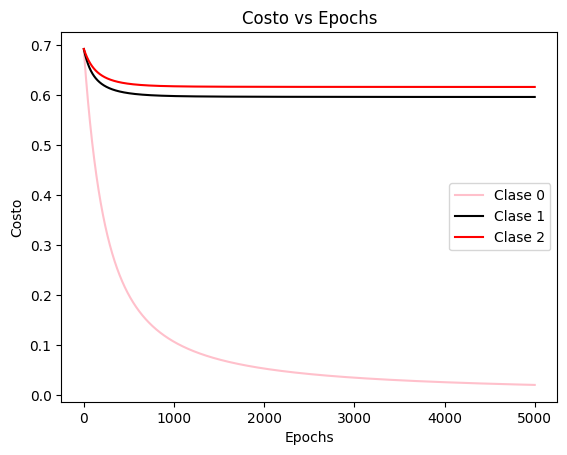

Precisión del modelo en el conjunto de prueba: 76.14%


In [25]:

# Funciones auxiliares
#convierte cualquier número en un valor entre 0 y 1, lo que se interpreta como una probabilidad.    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Esta función calcula el costo (o pérdida) del modelo dado un conjunto de parámetros theta, entradas X y etiquetas verdaderas y.

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Para evitar log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

#Implementa el algoritmo de descenso de gradiente. La idea es actualizar los parámetros theta iterativamente para minimizar la función de costo.
def gradient_descent(X, y, theta, alpha, num_epochs):
    m = len(y)
    cost_history = []
    for epoch in range(num_epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Entrenar un modelo One-vs-All
def one_vs_all(X_train, y_train, num_classes, alpha=0.01, num_epochs=1000):
    m, n = X_train.shape
    all_theta = np.zeros((num_classes, n))  # Guardar los theta de cada clase
    all_costs = []  # Guardar los costos para cada clase

    for i in range(num_classes):
        print(f"Entrenando clase {i + 1} de {num_classes}...")
        # Preparar el vector de salida para la clase actual
        y_class = np.where(y_train == i, 1, 0)

        # Inicializar los pesos theta para la clase
        theta = np.zeros(n)

        # Entrenar con gradient descent
        theta, cost_history = gradient_descent(X_train, y_class, theta, alpha, num_epochs)

        # Guardar los theta y el costo
        all_theta[i, :] = theta
        all_costs.append(cost_history)

    return all_theta, all_costs

# Paso 5: Visualizar los costos por cada clase
def plot_cost_history(all_costs, num_epochs):
    colors = ['pink', 'black', 'red']
    for i, cost_history in enumerate(all_costs):
        # Usar los colores predefinidos: rosa, negro, rojo
        plt.plot(range(num_epochs), cost_history, label=f'Clase {i}', color=colors[i % len(colors)])

    plt.title('Costo vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

# Entrenamiento y visualización
num_classes = len(np.unique(y_train))  # Número de clases
alpha = 0.01  # Tasa de aprendizaje
num_epochs = 5000  # Número de épocas

# Entrenar el modelo One-vs-All
all_theta, all_costs = one_vs_all(X_train, y_train, num_classes, alpha, num_epochs)

# Visualizar el costo por epochs para cada clase
plot_cost_history(all_costs, num_epochs)

# Paso 10: Evaluar la precisión en el conjunto de prueba
def predict(X, all_theta):
    # Calcular la probabilidad para cada clase
    prob = sigmoid(np.dot(X, all_theta.T))
    return np.argmax(prob, axis=1)

y_pred = predict(X_test, all_theta)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}%")

Entrenando modelo para la clase 0...


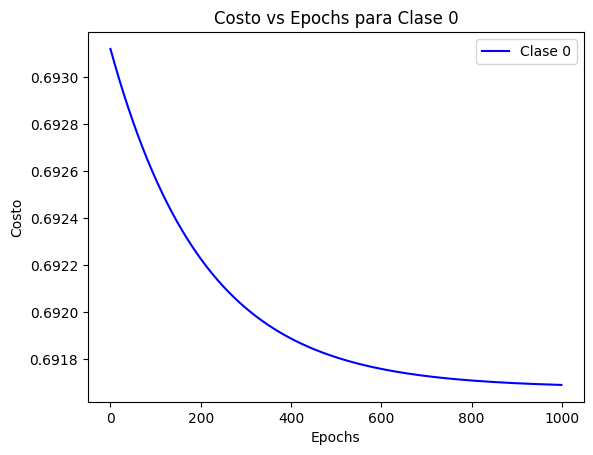

Precisión del modelo para la clase 0: 53.10%
Entrenando modelo para la clase 1...


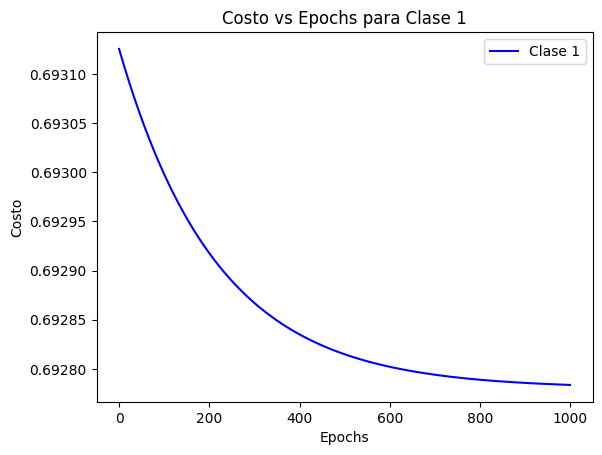

Precisión del modelo para la clase 1: 50.60%
Entrenando modelo para la clase 2...


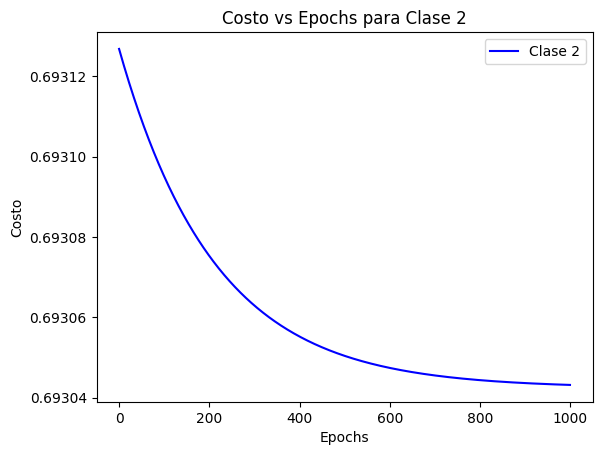

Precisión del modelo para la clase 2: 50.50%


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Función Sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de Costo
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Para evitar log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Algoritmo de descenso de gradiente
def gradient_descent(X, y, theta, alpha, num_epochs):
    m = len(y)
    cost_history = []
    for epoch in range(num_epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Entrenamiento para una clase en particular
def train_class(X_train, y_train, class_label, alpha=0.01, num_epochs=1000):
    m, n = X_train.shape
    
    # Preparar el vector de salida para la clase actual
    y_class = np.where(y_train == class_label, 1, 0)

    # Inicializar los pesos theta para la clase
    theta = np.zeros(n)

    # Entrenar con descenso de gradiente
    theta, cost_history = gradient_descent(X_train, y_class, theta, alpha, num_epochs)

    return theta, cost_history

# Visualizar los costos
def plot_cost_history(cost_history, num_epochs, class_label):
    plt.plot(range(num_epochs), cost_history, label=f'Clase {class_label}', color='blue')
    plt.title(f'Costo vs Epochs para Clase {class_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

# Evaluar la precisión
def predict(X, theta):
    prob = sigmoid(np.dot(X, theta))
    return np.where(prob >= 0.5, 1, 0)

# Simulación de los datos de entrenamiento
np.random.seed(0)
X_train = np.random.randn(1000, 3)  # 1000 muestras con 3 características
y_train = np.random.randint(0, 3, size=1000)  # 3 clases (0, 1, 2)

# Definir los hiperparámetros
alpha = 0.01  # Tasa de aprendizaje
num_epochs = 1000  # Número de épocas

# Entrenar y graficar solo para la clase 1
class_label = 1
print(f"Entrenando modelo para la clase {class_label}...")
theta, cost_history = train_class(X_train, y_train, class_label, alpha, num_epochs)

# Visualizar el costo por epochs para la clase 1
plot_cost_history(cost_history, num_epochs, class_label)

# Evaluar la precisión para la clase 1
y_pred = predict(X_train, theta)
accuracy = np.mean(y_pred == (y_train == class_label)) * 100
print(f"Precisión del modelo para la clase {class_label}: {accuracy:.2f}%")


Dimensiones de all_theta: (3, 4)


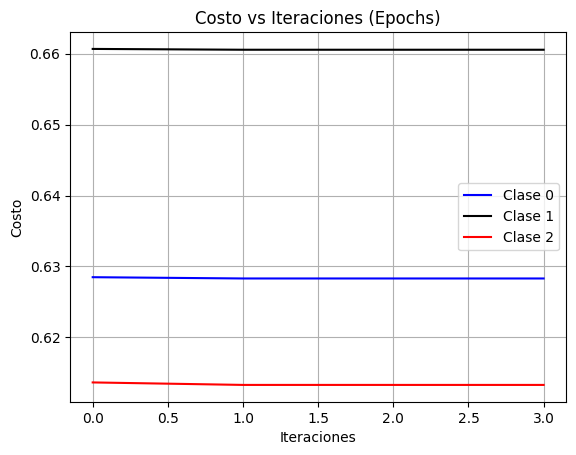

ValueError: shapes (10195,28) and (4,3) not aligned: 28 (dim 1) != 4 (dim 0)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Función sigmoide
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Función de coste y gradiente para la regresión logística regularizada
def lrCostFunction(theta, X, y, lambda_):
    m = y.size  # Número de ejemplos
    if y.dtype == bool:
        y = y.astype(int)

    # Calcular hipótesis
    h = sigmoid(X.dot(theta))

    # Regularización: no penalizar el término theta[0]
    temp = theta.copy()
    temp[0] = 0  # No penalizar theta[0]

    # Calcular el coste regularizado
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Calcular el gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

# Función para entrenar el modelo One-vs-All y registrar el historial de costos
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_costs = []

    # Agregar una columna de unos a X (bias)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        cost_history = []

        # Función para registrar el coste en cada iteración
        def callback(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)

        # Optimización de la función de coste
        res = optimize.minimize(fun=lrCostFunction,
                                x0=initial_theta,
                                args=(X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callback)

        all_theta[c] = res.x
        all_costs.append(cost_history)

    return all_theta, all_costs

# Predicción utilizando el modelo One-vs-All
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    return p

# Función para graficar el costo
def plot_cost_history(all_costs, num_epochs):
    colors = ['blue', 'black', 'red']  # Colores rosa, negro y rojo
    for i, cost_history in enumerate(all_costs):
        plt.plot(range(len(cost_history)), cost_history, label=f'Clase {i}', color=colors[i % len(colors)])
    plt.title('Costo vs Iteraciones (Epochs)')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parámetros
input_layer_size = 26
num_labels = 3
lambda_ = 0.1

# Entrenamiento del modelo One-vs-All y almacenamiento del historial de costos
all_theta, all_costs = oneVsAll(X_train, y_train, num_labels, lambda_)
print("Dimensiones de all_theta:", all_theta.shape)

# Graficar el historial de costos
plot_cost_history(all_costs, num_epochs=50)

# Predicción en el conjunto de prueba
pred = predictOneVsAll(all_theta, X_test)
print('Precisión del conjunto de prueba: {:.2f}%'.format(np.mean(pred == y_test) * 100))

# Predicción para una parte de los datos de prueba
XPrueba = X_test[10:150, :].copy()
print("Dimensiones de XPrueba antes de agregar bias:", XPrueba.shape)

# Agregar columna de bias (unos) a XPrueba
XPrueba = np.concatenate([np.ones((XPrueba.shape[0], 1)), XPrueba], axis=1)
print("Dimensiones de XPrueba después de agregar bias:", XPrueba.shape)

# Predicción para los datos seleccionados
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)
print("Predicciones:", p)

# Mostrar las etiquetas reales de y_test para comparación
print("Etiquetas reales:", y_test[10:150])